<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
#!pip install "tensorflow<2.11"

In [ ]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
#!pip install torchvision

In [ ]:

#!pip list
import torch

In [ ]:
#!nvidia-smi

In [ ]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [ ]:
# add headings with ##(space) on the markdowns

In [ ]:
#!pip install tensorflor keras

In [ ]:
import tensorflow as tf
import os

In [ ]:
!nvidia-smi

Mon Apr 15 19:34:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
|  0%   52C    P0              42W / 125W |    733MiB /  6144MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#! nvidia-smi

In [ ]:
!pip install opencv-python

## Imports

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr

## Removing false images

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
#os.chdir(path)

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
data_dir='data'
os.listdir(data_dir)

['Ads', 'Sample_Images']

In [ ]:
#os.listdir(os.path.join(data_dir,'Ads'))

In [ ]:
imgTest= cv2.imread(os.path.join('data','Ads','converted_iframe_9_AD.jpg'))

In [ ]:
type(imgTest)

numpy.ndarray

In [ ]:
imgTest.shape

(250, 970, 3)

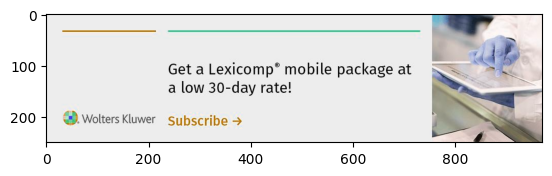

In [ ]:
plt.imshow(imgTest)

In [ ]:
#plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
#plt.show()

Load Data

In [ ]:
#tf.data.Dataset??

In [ ]:
#tf.keras.utils.audio_dataset_from_directory??

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 2386 files belonging to 2 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()


In [ ]:
batch=data_iterator.next()


In [ ]:
len(batch) # batch contain 2 items, the image batch[0] and the label batch[1]

2

In [ ]:
batch[0].shape # images are numpy arrays

(32, 256, 256, 3)

In [ ]:
batch[1] # labels

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

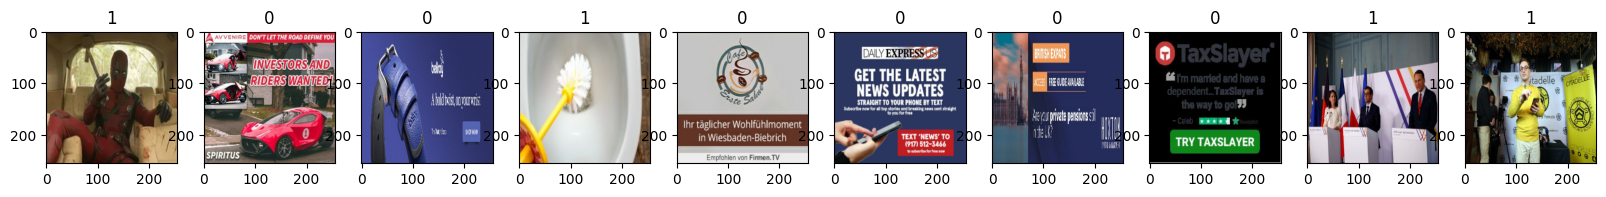

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20)) # class 1= simple image, class 0 = Ad
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

In [ ]:
print(batch[0].max()) # our pixels are between values 0 and 255. we will scale them to be between 0 and 1

255.0


In [ ]:
#batch[0] / 255

In [ ]:
scaled= data.map(lambda x,y: (x/255, y)) # as we load a batch from the pipeline, we scale them on the go

In [ ]:
#scaled.as_numpy_iterator().next()

In [ ]:
scaled_iterator=scaled.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

In [ ]:
#scaled.as_numpy_iterator().next()

# Split Data

In [ ]:
#len(scaled)
len(data)

44

In [ ]:
train_size = int(len(scaled)*.7)# batch size 8, 156 batches, 32, 41 batches
val_size = int(len(scaled)*.2) # 44 batces
test_size = int(len(scaled)*.1) # 22 batches
#test_size = int(len(scaledtest)) # 22 batches

In [ ]:
print(f'Train Size: {train_size}, Val Size:{val_size}, Test Size: {test_size}')


Train Size: 52, Val Size:15, Test Size: 7


In [ ]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

In [ ]:
#train.as_numpy_iterator().next()[0]

array([[[[0.8806372 , 0.70526963, 0.81844366],
         [0.89577204, 0.7387255 , 0.84522057],
         [0.89528185, 0.7706495 , 0.8670956 ],
         ...,
         [0.5074755 , 0.40784314, 0.54626226],
         [0.46568626, 0.36930147, 0.5172794 ],
         [0.3954044 , 0.30747548, 0.45704657]],

        [[0.88521755, 0.711818  , 0.8207338 ],
         [0.9013185 , 0.7423396 , 0.84654456],
         [0.90215224, 0.7729396 , 0.8670956 ],
         ...,
         [0.50296676, 0.40036443, 0.53488314],
         [0.4411031 , 0.34410998, 0.48714983],
         [0.40334833, 0.31180528, 0.45647404]],

        [[0.8908854 , 0.716652  , 0.8211627 ],
         [0.90818197, 0.74611676, 0.8467925 ],
         [0.9106541 , 0.7749281 , 0.8662501 ],
         ...,
         [0.50599295, 0.39922675, 0.52856195],
         [0.42417315, 0.32415375, 0.461966  ],
         [0.38749367, 0.29080188, 0.43077585]],

        ...,

        [[0.8786005 , 0.9531103 , 0.84330636],
         [0.8812883 , 0.9557981 , 0.8459942 ]

In [ ]:
#batch[0]

In [ ]:
len(train)

30

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout, BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('rmsprop', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                        

# Train

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val)


val_acc_per_epoch = hist.hist['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30


52/52 [==============================] - 10s 111ms/step - loss: 0.6369 - accuracy: 0.7776 - val_loss: 0.7612 - val_accuracy: 0.4917
Epoch 2/30
52/52 [==============================] - 6s 108ms/step - loss: 0.3838 - accuracy: 0.8425 - val_loss: 1.8587 - val_accuracy: 0.4958
Epoch 3/30
52/52 [==============================] - 6s 104ms/step - loss: 0.2944 - accuracy: 0.8816 - val_loss: 0.6508 - val_accuracy: 0.5167
Epoch 4/30
52/52 [==============================] - 6s 106ms/step - loss: 0.2439 - accuracy: 0.8996 - val_loss: 0.9080 - val_accuracy: 0.6354
Epoch 5/30
52/52 [==============================] - 6s 105ms/step - loss: 0.2152 - accuracy: 0.9159 - val_loss: 0.6112 - val_accuracy: 0.6854
Epoch 6/30
52/52 [==============================] - 5s 103ms/step - loss: 0.1670 - accuracy: 0.9363 - val_loss: 1.3694 - val_accuracy: 0.5125
Epoch 7/30
52/52 [==============================] - 5s 104ms/step - loss: 0.1211 - accuracy: 0.9549 - val_loss: 0.4301 - val_accuracy: 0.7875
Epoch 8/30
52/52

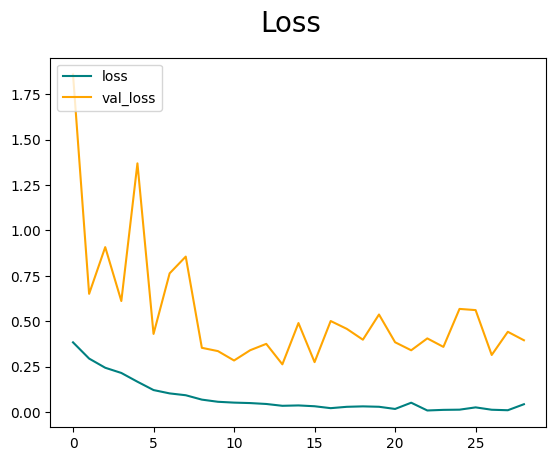

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'][1:], color='teal', label='loss')
plt.plot(hist.history['val_loss'][1:], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

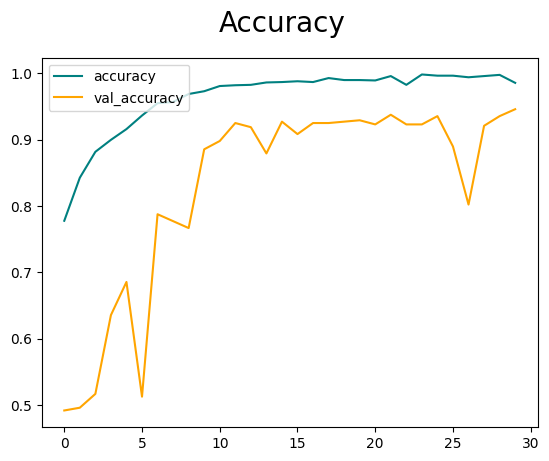

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [ ]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

1/1 [==============================] - 0s 146ms/step
Precision: 1.0, Recall:0.9230769276618958, Accuracy: 0.96875
1/1 [==============================] - 0s 31ms/step
Precision: 0.9032257795333862, Recall:0.875, Accuracy: 0.890625
1/1 [==============================] - 0s 29ms/step
Precision: 0.9200000166893005, Recall:0.8846153616905212, Accuracy: 0.8958333134651184
1/1 [==============================] - 0s 28ms/step
Precision: 0.90625, Recall:0.892307698726654, Accuracy: 0.8984375
1/1 [==============================] - 0s 28ms/step
Precision: 0.9036144614219666, Recall:0.9036144614219666, Accuracy: 0.8999999761581421
1/1 [==============================] - 0s 29ms/step
Precision: 0.8877550959587097, Recall:0.90625, Accuracy: 0.8958333134651184
1/1 [==============================] - 0s 29ms/step
Precision: 0.886956512928009, Recall:0.9107142686843872, Accuracy: 0.8973214030265808


# Extra Testing on Unseen Data

In [ ]:
import cv2

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
#img = cv2.imread('sim.jpg')
#img= cv2.imread(os.path.join('testData','4.png')) # s (246).jpg, 9.png, 4.png, s (481).jpg
img= cv2.imread(os.path.join('unseen data','iframe_221_AD.jpg')) # futurama.jpeg, homer-simpson-wallpaper-preview.jpg , zoid.jpeg, bart-simpson-.jpg, fry.jpeg, homer-simpson-the-simpsons-.jpg, marg.jpg
#img

In [ ]:
len(img)


384

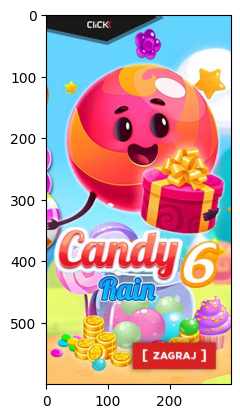

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 20ms/step


array([[0.00172506]], dtype=float32)

simple image = 1 <br>
Ad = 0

In [ ]:
#class 1= simple img, class 0 = Ad

if yhat > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


# Saving the model

In [ ]:
from keras.models import load_model

In [ ]:
#model.save(os.path.join('models','ad_classifier_first.h5'))
model.summary()

Check also the following article https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

Keras Tuner : https://www.tensorflow.org/tutorials/keras/keras_tuner


# Appling a Pre-trained CNN on our Dataset for comparison

The VGG16 model

In [ ]:
#from keras.applications import VGG16

#conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(256, 256, 3))

In [ ]:
#conv_base.summary()


We will add a dense layer after our conv_base NN

In [ ]:
# from keras import models
# from keras import layers

# modelPreT = models.Sequential()
# modelPreT.add(conv_base)

# modelPreT.add(layers.Flatten())
# modelPreT.add(layers.Dense(256, activation='relu'))
# modelPreT.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#modelPreT.summary()

Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the VGG16

In [ ]:
#print('This is the number of trainable weights '
#      'before freezing the conv base:', len(modelPreT.trainable_weights))

In [ ]:
#conv_base.trainable = False

In [ ]:
#print('This is the number of trainable weights '
 #     'after freezing the conv base:', len(modelPreT.trainable_weights))

In [ ]:
#modelPreT.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#train.as_numpy_iterator().next()[0]

In [ ]:
#histPreT = modelPreT.fit(train, epochs=4, validation_data=val) #  epochs 10 are over fitting. early stop at?

In [ ]:
# acc = histPreT.history['accuracy']
# val_acc = histPreT.history['val_accuracy']
# loss = histPreT.history['loss']
# val_loss = histPreT.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [ ]:
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

In [ ]:
# for batch in test.as_numpy_iterator():
#     X, y = batch
#     yhatPreT = modelPreT.predict(X)
#     pre.update_state(y, yhatPreT)
#     re.update_state(y, yhatPreT)
#     acc.update_state(y, yhatPreT)
#     print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

In [ ]:
#imgPre= cv2.imread(os.path.join('testData','Unseen','futurama1.jpg')) # marg.jpg, homer-simpson-the-simpsons-.jpg, 4.png, s (481).jpg , images.jpg, bender.jpeg, fry.jpeg
#imgPre= cv2.imread(os.path.join('testData','s (481).jpg')) # marg.jpg, homer-simpson-the-simpsons-.jpg, 4.png, s (481).jpg , images.jpg, bender.jpeg, fry.jpeg

In [ ]:
#plt.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
#plt.show()

In [ ]:
#resizePreT = tf.image.resize(imgPre, (256,256))
#resize

In [ ]:
#plt.imshow(resizePreT.numpy().astype(int))
#plt.show()

In [ ]:
#np.expand_dims(resizePreT,0).shape

In [ ]:
#yhat_newPreT = modelPreT.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
#yhat_newPreT

For the pretrained model the classes were inverted, so we have:

Simpsons = 0 <br>
Futurama = 1

In [ ]:
#class 0= futurama, class 1 = simpsons

# if yhat_newPreT < 0.5:
#     print(f'Predicted class is simpsons')
# else:
#     print(f'Predicted class is futurama')

In [ ]:
#modelPreT.save(os.path.join('models','Pretrained_futurama_and_simpsons.h5'))
#modelPreT.summary()  # As a reminder.